In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

# Perlin Noise

In [142]:
int( -9.8 // 1 )
int( -9.8)


-9

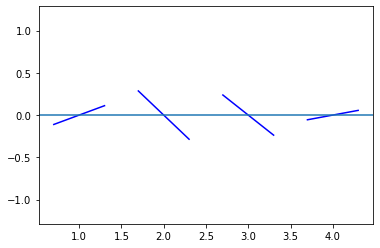

In [98]:
end_point = 4
points = np.arange(1, end_point + 1)
slopes = np.random.uniform(-1, 1, 4)

def draw_lines(points, slopes):
    for index, xi in enumerate(points):
        x = np.array([-0.3, 0.3]) + xi
        y = slopes[index] * (x - xi)
        plt.plot(x, y, 'b')

    plt.axhline(0)
    plt.axis('equal')
    
draw_lines(points, slopes)
plt.show()

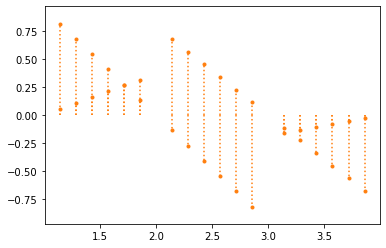

In [101]:
def draw_stems(points, slopes, divisions):
    for index, xi in enumerate(points[:-1]):
        x = np.linspace(xi, xi + 1, divisions)[1:-1]
        y1 = slopes[index] * (x - xi)
        y2 = slopes[index + 1] * (x - xi - 1)
        plt.stem(x, y1, basefmt=' ', linefmt='C1:', markerfmt='C1.')
        plt.stem(x, y2, basefmt=' ', linefmt='C1:', markerfmt='C1.')
    plt.axis('equal')

draw_stems(points, slopes, divisions=8)
plt.show()

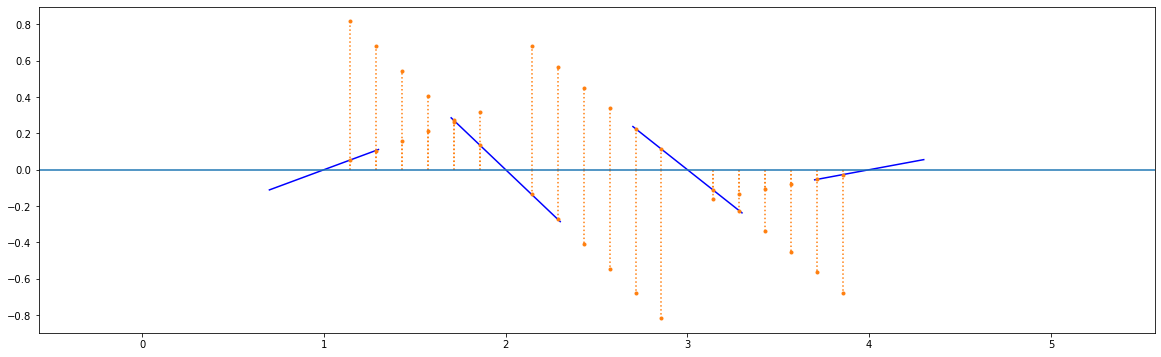

In [102]:
plt.figure(figsize=(20,6))
draw_lines(points, slopes)
draw_stems(points, slopes, divisions=8)
plt.show()

In [33]:
def lerp(a,b,t):
    """
    Linear Interpolation (aka lerp) between two points.
    
    a - starting position
    b - the other position
    t - percentage of the distance between a and b
    """
    return a + (b - a) * t

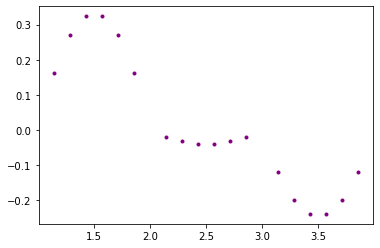

In [125]:
def draw_interpolation(points, slopes, divisions):
    for index, xi in enumerate(points[:-1]):
        x = np.linspace(xi, xi + 1, divisions)[1:-1]
        y1 = slopes[index] * (x - xi)
        y2 = slopes[index + 1] * (x - xi - 1)
       
        t = x - xi
        y_interpolated = np.vectorize(lerp)(y1, y2, t)
        plt.scatter(x, y_interpolated, marker='.', c='purple')

draw_interpolation(points, slopes, 8)
plt.show()

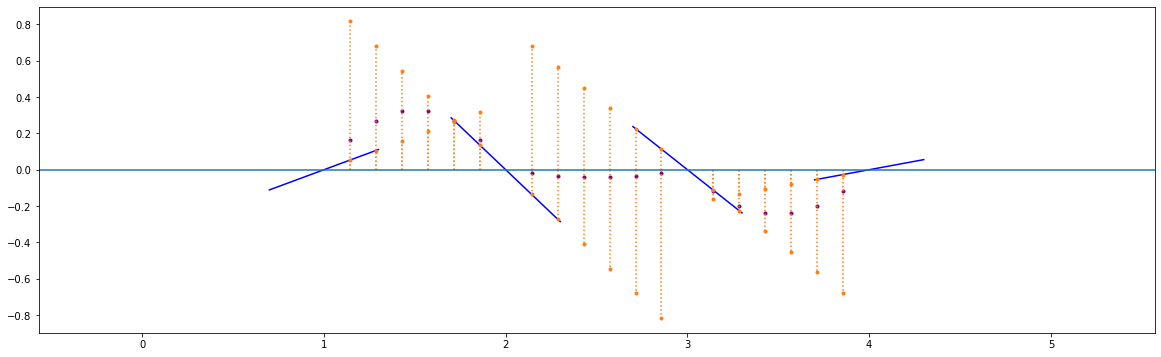

In [126]:
plt.figure(figsize=(20,6))
draw_lines(points, slopes)
draw_stems(points, slopes, divisions=8)
draw_interpolation(points, slopes, 8)

plt.show()

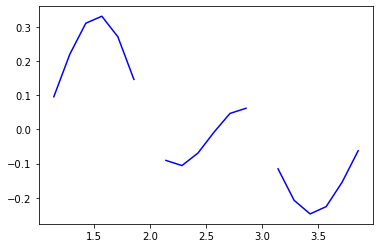

In [132]:
def draw_smooth_interpolation(points, slopes, divisions, smooth_func, color='blue'):
    for index, xi in enumerate(points[:-1]):
        x = np.linspace(xi, xi + 1, divisions)[1:-1]
        y1 = slopes[index] * (x - xi)
        y2 = slopes[index + 1] * (x - xi - 1)
        
        t = smooth_func(x - xi)
        y_interpolated = np.vectorize(lerp)(y1, y2, t)
        plt.plot(x, y_interpolated, c=color)


smoothstep_function = np.vectorize(lambda x: -2 * x ** 3 + 3 * x ** 2)
draw_smooth_interpolation(points, slopes, 8, smoothstep_function)
plt.show()

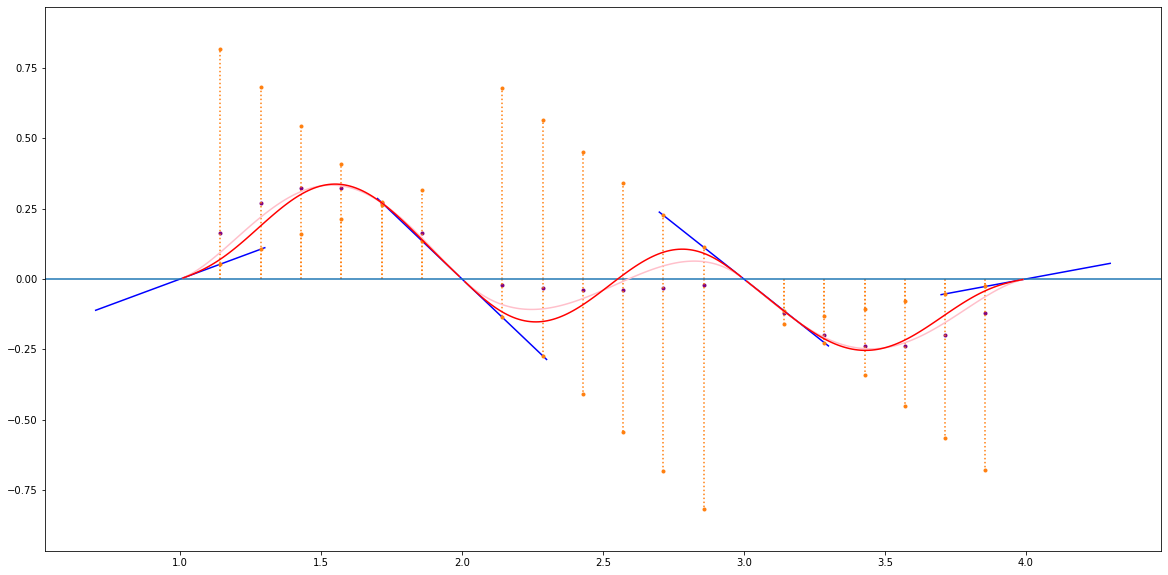

In [134]:
plt.figure(figsize=(20,10))
draw_lines(points, slopes)
draw_stems(points, slopes, divisions=8)
draw_interpolation(points, slopes, 8)

# 
smoothstep_function = np.vectorize(lambda x: -2 * x ** 3 + 3 * x ** 2)
draw_smooth_interpolation(points, slopes, 100, smoothstep_function, 'pink')

# Improved smoothstep
smoothstep_function = np.vectorize(lambda x: 6 * x ** 5 - 15 * x ** 4 + 10 * x ** 3)
draw_smooth_interpolation(points, slopes, 100, smoothstep_function, 'red')

plt.show()

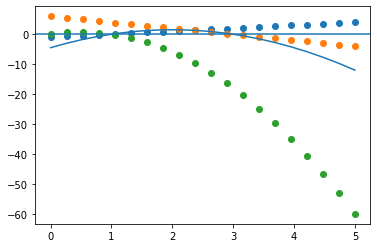

In [46]:

# Coeffitients
a, b = 1, -1
c, d = -2, 6

# Define functions
lin_func = lambda a, b: lambda x: a * x + b
y1 = lin_func(a, b)
y2 = lin_func(c, d)
t = lambda x: (x + b/a) / (-d/c + b/a)

# Generate values
line_x = np.linspace(0,5,20)
line_y1 = y1(line_x)
line_y2 = y2(line_x)
y_interpolated = np.vectorize(lerp)(line_y1, line_y2, t(line_x))

# Plot
plt.scatter(line_x, line_y1)
plt.scatter(line_x, line_y2)
plt.plot(line_x, y_interpolated)

y_int2 = (a - c) * (line_x - line_x * line_x)
plt.scatter(line_x, y_int2)


plt.axhline(0)
plt.show()

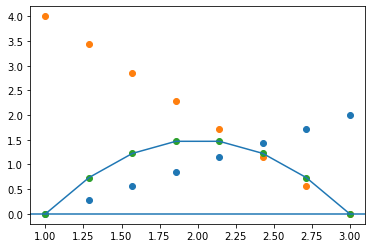

In [43]:
y1 = lambda x: x - 1
y2 = lambda x : - 2 * x + 6


start = 1
end = 3
line_x = np.linspace(start, end, 8)
line_y1 = y1(line_x)
line_y2 = y2(line_x)

t = (line_x - start) / (end - start)
y_lerp = np.vectorize(lerp)(line_y1, line_y2, t) 

plt.scatter(line_x, line_y1)
plt.scatter(line_x, line_y2)
plt.scatter(line_x, y_lerp)

y_quad = lambda x: -1.5 * x ** 2 + 6 * x - 4.5
plt.plot(line_x, y_quad(line_x))

plt.axhline(0)
plt.show()

[0.1 0.3 0.4 0.6 0.7 0.8] [0.5 0.4 0.3 0.2 0.2 0.1] [0.2 0.3 0.4 0.4 0.3 0.2]
[-0.1 -0.2 -0.2 -0.3 -0.4 -0.5] [-0.7 -0.6 -0.5 -0.4 -0.2 -0.1] [-0.2 -0.3 -0.3 -0.3 -0.3 -0.2]
[0.1 0.2 0.4 0.5 0.6 0.7] [0.4 0.3 0.2 0.2 0.1 0.1] [0.2 0.3 0.3 0.3 0.3 0.2]


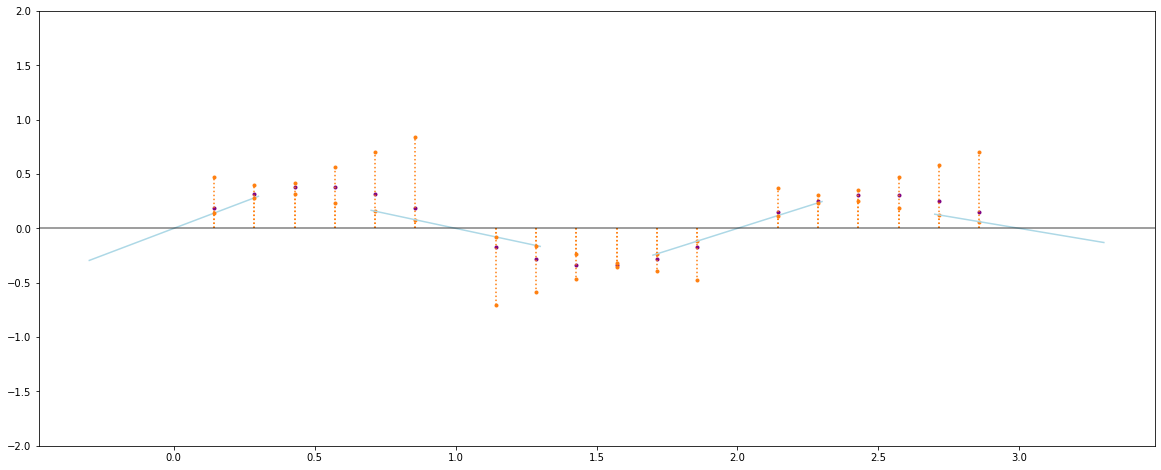

In [8]:
end = 4
slopes = np.random.uniform(-1,1, end + 1)
plt.figure(figsize=(20, 8))
for i in range(end):
    line_x = np.array([i - 0.3, i + 0.3])
    line_y = slopes[i] * (line_x - i)
    plt.plot(line_x, line_y, 'lightblue')
    if i == end - 1:
        break
    
   
    x = np.linspace(i, i + 1, 8)[1:-1]
    y1 = slopes[i] * (x - i)
    y2 = slopes[i+1] * (x - i - 1)
    y_mid = np.vectorize(lerp)(y1, y2, x-i)
    print(y1.round(1), y2.round(1), y_mid.round(1))
    plt.scatter(x, y_mid, c='purple', marker='.') 
    
    for y in [y1, y2]:
        plt.stem(x, y, linefmt='C1:', markerfmt='C1.', basefmt=" ")


plt.axhline(y=0, color='black', linestyle='-', alpha=0.5 )
plt.ylim(-2, 2)
plt.show()


In [251]:
# Generate points on the x axis
# Major (line centers)
points_num = 6
major_points = list(range(1, points_num + 1))

# Minor (between centers)
divisions = 8
minor_points = np.array([
    np.linspace(xi, xi + 1, divisions)[1:-1]
    for xi in major_points[:-1]]).ravel()

# Test
major_points, minor_points

([1, 2, 3, 4, 5, 6],
 array([1.14285714, 1.28571429, 1.42857143, 1.57142857, 1.71428571,
        1.85714286, 2.14285714, 2.28571429, 2.42857143, 2.57142857,
        2.71428571, 2.85714286, 3.14285714, 3.28571429, 3.42857143,
        3.57142857, 3.71428571, 3.85714286, 4.14285714, 4.28571429,
        4.42857143, 4.57142857, 4.71428571, 4.85714286, 5.14285714,
        5.28571429, 5.42857143, 5.57142857, 5.71428571, 5.85714286]))

In [253]:
# Generate slope
slopes = np.random.uniform(-1,1, points_num)

lines = [
    generate_line(xi, 0, slope=slope[i], x_len=0.25, points_num=2)
    for xi in major_points
]

# Plot
for idx, xi in enumerate(major_points):
    slope = np.random.uniform(-1,1)
    line_x, line_y = generate_line(xi, 0, slope=slope[i], x_len=0.25, points_num=2)

    plt.plot(line_x, line_y, 'b')
    plt.stem(minor_points[minor_points < xi]

plt.ylim(-2, 2)
plt.axis('equal')
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_18636/2851620031.py, line 18)

In [234]:
def generate_line(center_x=0, center_y=0, slope=1, x_len=1, points_num=10):
    """
    Generates a line centered in point with given slope and lenght.
    `slope` - slope in rad
    """
    line_x = np.linspace(center_x - x_len, center_x + x_len, points_num)
    line_y = slope * (line_x - center_x) + center_y
    
    return line_x, line_y

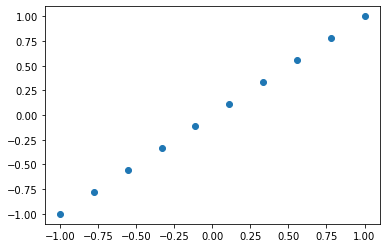

In [238]:
# Test
plt.scatter(*generate_line())
plt.show()

In [246]:
# Generate center points
# Major (line centers)
points_num = 6
major_points = list(range(1, points_num + 1))

# Minor (between centers)
divisions = 8
minor_points = np.array([
    np.linspace(xi, xi + 1, divisions)[1:-1]
    for xi in major_points[:-1]]).ravel()

# Test
major_points, minor_points

([1, 2, 3, 4, 5, 6],
 array([1.14285714, 1.28571429, 1.42857143, 1.57142857, 1.71428571,
        1.85714286, 2.14285714, 2.28571429, 2.42857143, 2.57142857,
        2.71428571, 2.85714286, 3.14285714, 3.28571429, 3.42857143,
        3.57142857, 3.71428571, 3.85714286, 4.14285714, 4.28571429,
        4.42857143, 4.57142857, 4.71428571, 4.85714286, 5.14285714,
        5.28571429, 5.42857143, 5.57142857, 5.71428571, 5.85714286]))

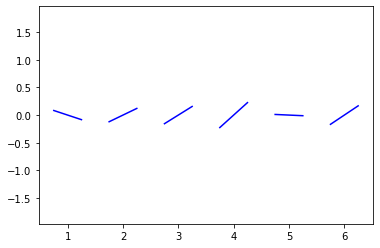

In [244]:
# Generate lines (= x, y values)
slopes = np.random.uniform(-1,1, points_num)
lines = [
    generate_line(xi, 0, slope=slope[i], x_len=0.25, points_num=2)
    for xi in major_points
]

# Plot
for line in lines:
    # Current line
    line_x, line_y = line
    plt.plot(line_x, line_y, 'b')
    
    #
    plt.stem(minor_points

plt.ylim(-2, 2)
plt.axis('equal')
plt.show()

ValueError: could not broadcast input array from shape (30,) into shape (5,)

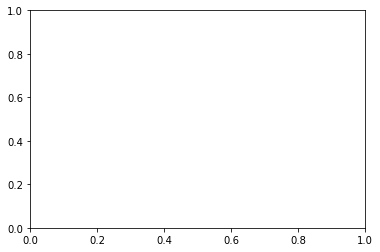

In [245]:
plt.stem(minor_points)
plt.show()

In [225]:
def generate_line_coords(center_x=0, center_y=0, l=1, theta=np.pi/4, points_num=10):
    x_max = np.abs(np.cos(theta) * (l / 2))
    r = np.linspace(-x_max, x_max, points_num)
    line_x = r * np.cos(theta)
    line_y = np.tan(theta) * line_x
    
    # Offset to center point
    line_x += center_x
    line_y += center_y
    
    return line_x, line_y

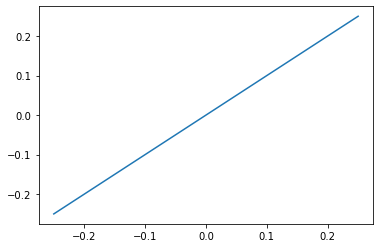

In [187]:
x, y = generate_line_coords()
plt.plot(x, y)
plt.show()

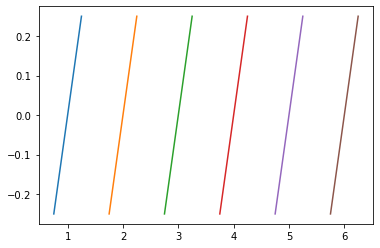

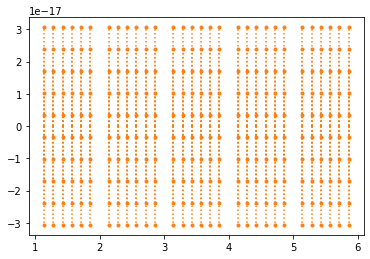

In [196]:

start = 1
points_num = 6
step = 1
stop = start + points_num * step
points = np.arange(start, stop , step)

divisions = 8
minor_points = np.array([np.linspace(n, n + 1, divisions)[1:-1] for n in points[:-1]])

# Sloped lines
lines = [generate_line_coords(x, 0) for x in points]
for line in lines:
    x, y = line
    plt.plot(x, y)
plt.show()
    
# Vertical lines
theta = np.pi/2
vertical_lines = [generate_line_coords(x, 0, theta=theta) for x in minor_points.ravel()]
for line in vertical_lines:
    x, y = line
    plt.stem(x, y, linefmt='C1:', markerfmt='C1.')
plt.show()






In [177]:
np.linspace?

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [102]:
def generate_inclined_line(center_x=0, center_y=0, theta=np.pi/4, lenght=1, points=100):
    """
    Generates 2d points of a line.
    Using polar coordinates allow line with any slope (even 90deg).

    `x`, `y` - coordinaties of the center point of the line
    `theta` - slope in radians
    `lenght` - lenght of the line
    """

    r = 0.5 * np.linspace(-lenght, lenght, points)
    line_x = r * np.cos(theta)
    line_y = np.tan(theta) * line_x
    
    # Shift the line to (x, y)
    line_x += center_x
    line_y += center_y
    
    return line_x, line_y

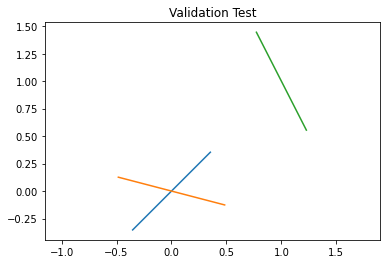

In [106]:
# Validate generate_inclined_line()
theta = iter(np.random.uniform(0, np.pi, 10))

plt.plot(*generate_inclined_line())
plt.plot(*generate_inclined_line(theta=next(theta)))
plt.plot(*generate_inclined_line(1, 1, theta=next(theta)))

plt.title('Validation Test')
plt.axis('equal')
plt.show()


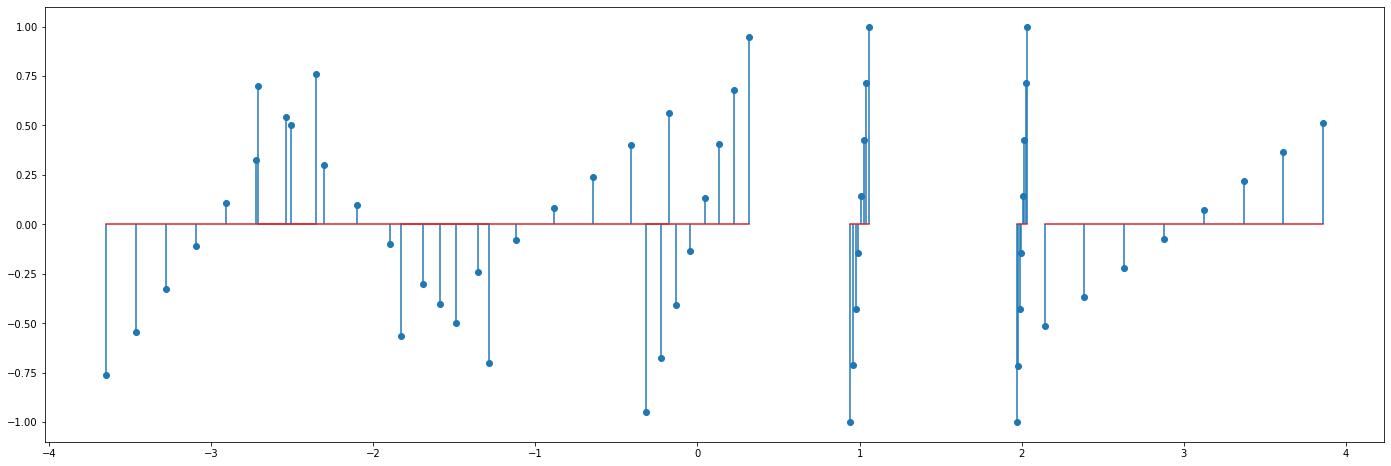

In [123]:
step = 1
center_points_x = np.arange(-3, 4, step)
lines = np.array([
    generate_inclined_line(center_x=x, theta=np.random.uniform(0, np.pi), lenght=2 * step, points=8)
    for x in center_points_x
])

plt.figure(figsize=(24, 8))

for line in lines:
    x, y = line
    plt.stem(x,y)

plt.show()

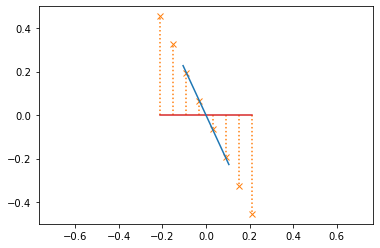

In [101]:
theta = np.random.uniform(0, np.pi)
x, y = generate_inclined_line(theta=theta, points=8)
plt.stem(x, y, linefmt='C1:', markerfmt='C1x')
plt.plot(x / 4, y / 2)
plt.axis('equal')
plt.show()

In [78]:
def plot_randomly_sloped_lines(x, line_len):
    """
    Plots a line on each coordinate in x with random slope between -1 and 1.
    
    `x` - x-corrdinates
    `line_len` - the length of the sloped line
    """

    fig = plt.figure()

    for xi in x:
        theta = np.random.uniform(0, np.pi)
        x_line, y_line = generate_inclined_line(xi, 0, theta, line_len)
        plt.plot(x_line, y_line, 'b-')

    ax = plt.gca()
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.spines[['bottom', ]].set_position('zero')
    plt.tick_params(
        axis='both',        # changes apply both x and y axes
        bottom=False,       # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        left=False,         # ticks along the left edge are off
        right=False,        # ticks along the right edge are off
        labelbottom=False,  # labels along the bottom edge are off
        labelleft=False,    # labels along the left edge are off
    )
    plt.ylim(-1,1)

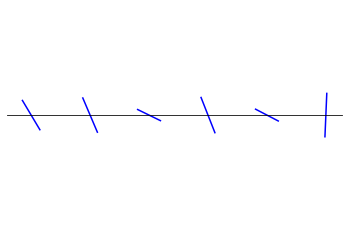

In [64]:
# Validate plot_randomly_sloped_lines()
plot_randomly_sloped_lines(x_major, 0.4)


In [334]:
step = 1
x = np.arange(-2, 3, step)

In [44]:
def lerp(a,b,t):
    """
    Linear Interpolation (aka lerp) between two points.
    
    a - starting position
    b - the other position
    t - percentage of the distance between a and b
    """
    return a + (b - a) * t

In [45]:
# Validate lerp()
lerp(1, 2, 0.3), lerp(6, 2, 0.1)  # expected (1.3, 5.6)

(1.3, 5.6)

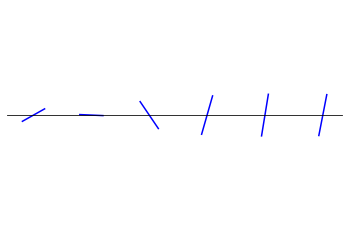

In [65]:
xmin = -3
xmax = 3
x_major = np.arange(xmin, xmax)
x_minor = np.arange(xmin, xmax, 0.1)
